In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gretalerer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
df = pd.read_csv('user_song_df.csv')

In [7]:
df.columns

Index(['user_id', 'track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes', 'track_name_preprocessed',
       'playlist_name_sentiment', 'track_name_sentiment', 'cluster'],
      dtype='object')

In [4]:
df.head()

,user_id,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,acousticness,instrumentalness,liveness,valence,tempo,duration_minutes,track_name_preprocessed,playlist_name_sentiment,track_name_sentiment,cluster
0,0,0nsG0DmswNIw4MXKVOeplj,Mo Fo,5107,37,2JjGzWuJXcloF0EdR8num1,10653,2019-11-15,techno house best collection top dj electronic...,3QEYvCsVXZj8KuzE0bDmcI,...,0.0487,0.030800,0.4460,0.626,128.021,3.62,mo fo,0.50,0.0,15
1,0,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with Justin Bieber),1080,83,6lMlX68jJrx67hiCqdiDvW,19352,2019-07-11,hits hits top global tracks,4JkkvMpVl4lSioqQjeAL0q,...,0.2520,0.330000,0.1170,0.680,135.055,3.25,bad guy justin bieber,0.25,-0.7,2
2,0,6RCCs5jOIu7ylHAEv8u2U9,Pełnia,8597,54,2ZW3jW3AYNaiwy5qSVNuRa,12515,2020-01-10,global x,37i9dQZF1DWUxHPh2rEiHr,...,0.5530,0.000028,0.1680,0.780,179.949,2.86,pełnia,0.00,0.0,2
3,0,3yOlyBJuViE2YSGn3nVE1K,My Oh My (feat. DaBaby),1510,94,3Vsbl0diFGw8HNSjG8ue9m,13732,2019-12-06,popular top,1fqkbjEACMlekdddm5aobE,...,0.0180,0.000013,0.0887,0.383,105.046,2.85,oh feat dababy,0.55,0.0,15
4,0,4mqnIo3Yus6PL4S8P5t1MQ,Homegrizzlies,3941,36,06MY63AuRPSndofMf6jE0j,7338,2016-05-16,mexican gangsta rap,28Ke4pXWqF2A5b2GfQ1pQt,...,0.0278,0.000000,0.2860,0.646,174.179,3.93,homegrizzlies,0.00,0.0,2


In [19]:
df.dtypes

user_id                       int64
track_id                     object
track_name                   object
track_artist                  int64
track_popularity              int64
track_album_id               object
track_album_name              int64
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre                int64
playlist_subgenre             int64
danceability                float64
energy                      float64
key                           int64
loudness                    float64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_minutes            float64
track_name_preprocessed      object
playlist_name_sentiment     float64
track_name_sentiment        float64
cluster                       int64
dtype: object

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Convert all column names to string
df.columns = df.columns.astype(str)

df_features = df.select_dtypes(exclude=['object'])

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df_features.columns)

# Add user_id back for grouping
df_scaled['user_id'] = df['user_id']

# Convert all column names to string
df_scaled.columns = df_scaled.columns.astype(str)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop('user_id', axis=1))
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'], index=df.index)
df_pca['user_id'] = df['user_id']

# Calculate user centroids in the PCA-reduced space
user_centroids_pca = df_pca.groupby('user_id')[['PC1', 'PC2']].mean()

# Re-define the function to calculate affinity score based on Euclidean distance in the reduced space
def calculate_affinity(user_id, song_features):
    user_centroid = user_centroids_pca.loc[user_id]
    distance = euclidean(user_centroid, song_features)
    affinity = 1 / (1 + distance)  # Inverse distance as affinity
    return affinity

# Calculate affinity scores for each song to its user in the reduced space
df['affinity_score'] = df_pca.apply(lambda row: calculate_affinity(row['user_id'], row[['PC1', 'PC2']]), axis=1)



/var/folders/sw/6q2vf2dx0r502xm9jxzvdxzc0000gn/T/ipykernel_40432/2926932948.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid['PC1'], centroid['PC2'], color=color, edgecolors='k', marker='x', s=100, lw=2, label=f'User {user_id} Centroid')


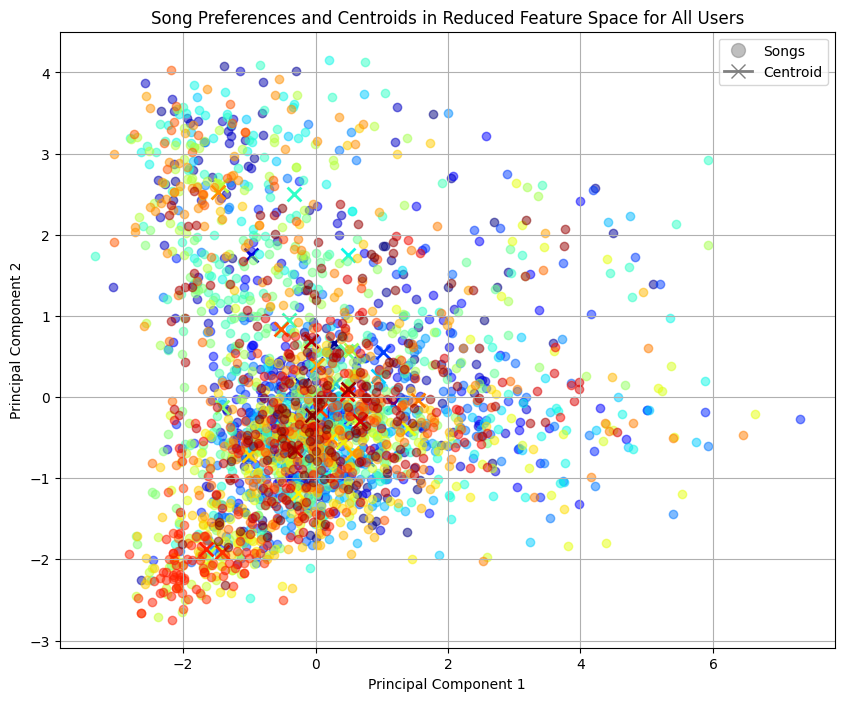

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the rest of your code is unchanged and correct up to this point

# Generate a color map for each user
unique_users = df_pca['user_id'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_users)))
user_color_map = {user_id: color for user_id, color in zip(unique_users, colors)}

plt.figure(figsize=(10, 8))

# Plot songs and centroids for all users on the same plot
for user_id, color in user_color_map.items():
    # Plot songs for each user
    user_songs = df_pca[df_pca['user_id'] == user_id]
    plt.scatter(user_songs['PC1'], user_songs['PC2'], color=color, alpha=0.5, label=f'User {user_id} Songs')
    
    # Plot user centroid
    centroid = user_centroids_pca.loc[user_id]
    plt.scatter(centroid['PC1'], centroid['PC2'], color=color, edgecolors='k', marker='x', s=100, lw=2, label=f'User {user_id} Centroid')

# Because we have many legends (each user + their centroid), let's simplify the legend
# Create custom legends
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='gray', lw=0, marker='o', markersize=10, alpha=0.5, label='Songs'),
                Line2D([0], [0], color='gray', marker='x', markersize=10, lw=2, label='Centroid')]
plt.legend(custom_lines, ['Songs', 'Centroid'])

plt.title('Song Preferences and Centroids in Reduced Feature Space for All Users')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


/var/folders/sw/6q2vf2dx0r502xm9jxzvdxzc0000gn/T/ipykernel_40432/3644205286.py:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid['PC1'], centroid['PC2'], color=color, edgecolors='k', marker='x', s=100, lw=2, label=f'User {user_id}')


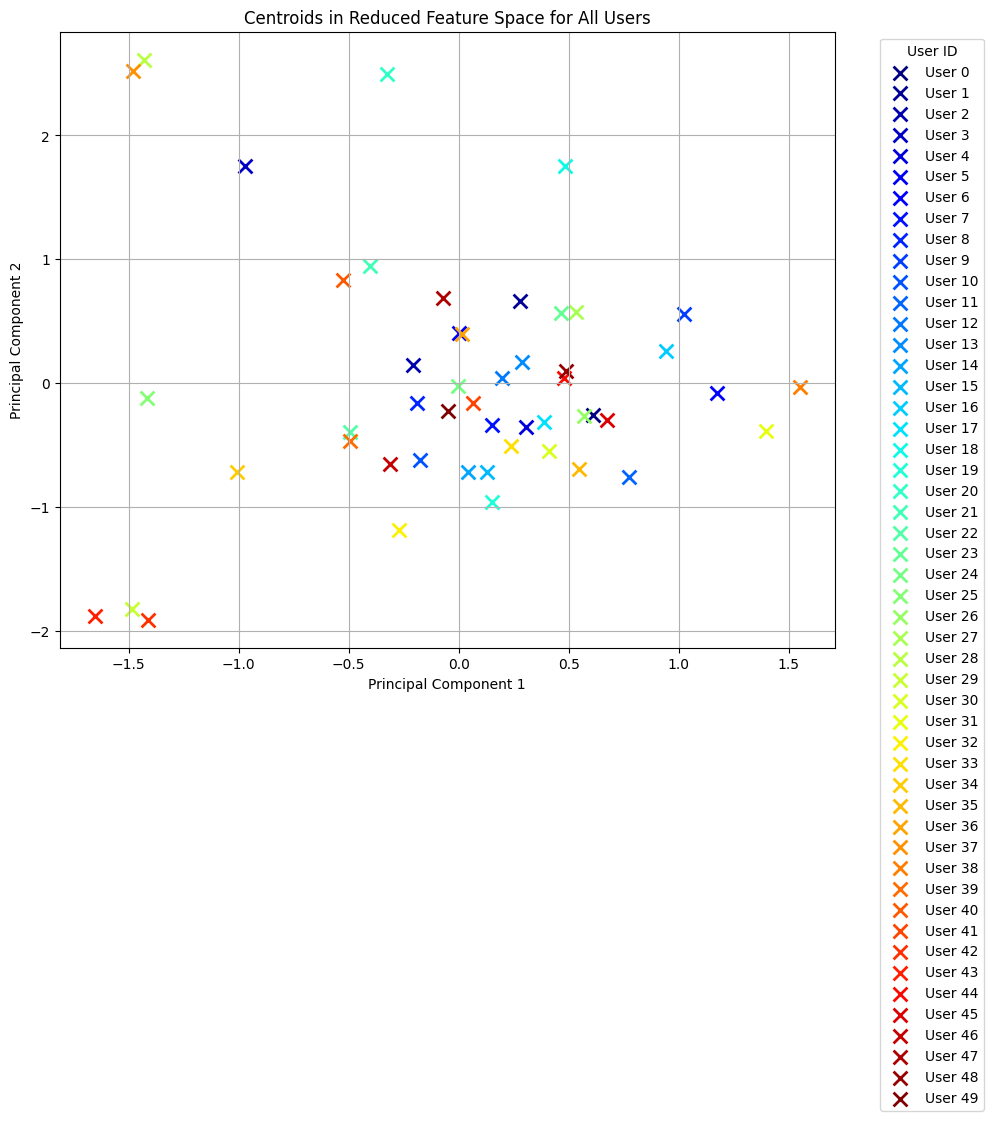

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the rest of your code is unchanged and correct up to this point

# Generate a color map for each user
unique_users = df_pca['user_id'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_users)))
user_color_map = {user_id: color for user_id, color in zip(unique_users, colors)}

plt.figure(figsize=(10, 8))

# Plot centroids for all users
for user_id, color in user_color_map.items():
    # Retrieve user centroid
    centroid = user_centroids_pca.loc[user_id]
    plt.scatter(centroid['PC1'], centroid['PC2'], color=color, edgecolors='k', marker='x', s=100, lw=2, label=f'User {user_id}')

plt.title('Centroids in Reduced Feature Space for All Users')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="User ID", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement to avoid overlap
plt.grid(True)
plt.show()


In [32]:
df.columns

Index(['user_id', 'track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_minutes', 'track_name_preprocessed',
       'playlist_name_sentiment', 'track_name_sentiment', 'cluster',
       'affinity_score'],
      dtype='object')